<ipython-input-13-e21355cd56e2>:47: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  candlestick_data[f'{col}_lag_{i}'] = candlestick_data[col].shift(i)
<ipython-input-13-e21355cd56e2>:47: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  candlestick_data[f'{col}_lag_{i}'] = candlestick_data[col].shift(i)
<ipython-input-13-e21355cd56e2>:47: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.conca

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003786 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 53856, number of used features: 4
[LightGBM] [Info] Start training from score -2.833213
[LightGBM] [Info] Start training from score -2.833213
[LightGBM] [Info] Start training from score -2.833213
[LightGBM] [Info] Start training from score -2.833213
[LightGBM] [Info] Start training from score -2.833213
[LightGBM] [Info] Start training from score -2.833213
[LightGBM] [Info] Start training from score -2.833213
[LightGBM] [Info] Start training from score -2.833213
[LightGBM] [Info] Start training from score -2.833213
[LightGBM] [Info] Start training from score -2.833213
[LightGBM] [Info] Start training from score -2.833213
[LightGBM] [Info] Start training from score -2.833213
[LightGBM] [Info] Start training from score -2.833213
[LightGBM]

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

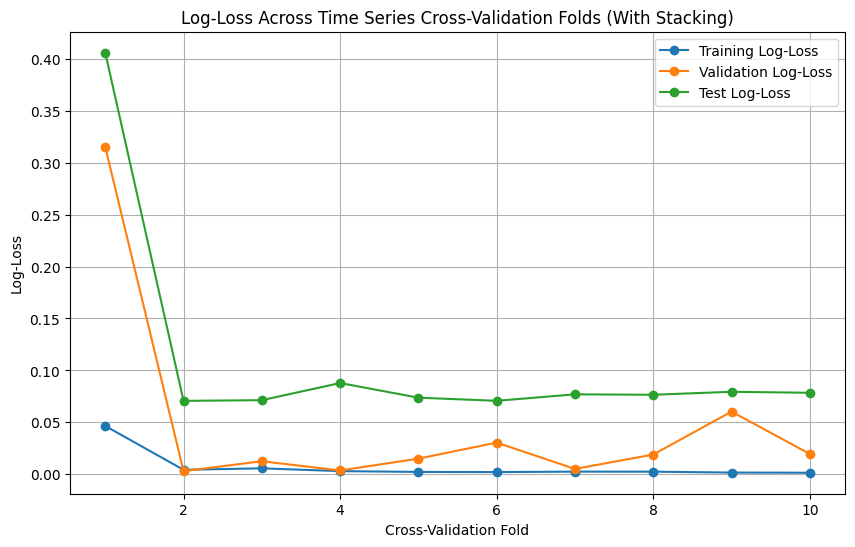

Final Log-Loss with Stacking: 0.0785
Final Accuracy with Stacking: 0.9867

Confusion Matrix with Stacking:
[[106   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   4]
 [  0 110   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  38   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 147   0   0   0   0   0   0   0   0   0   4   0   0   6]
 [  0   0   0   0  12   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  92   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  70   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  90   0   0   0   0   0   0   0   0   4]
 [  0   0   0   0   0   0   0   0  52   0   0   0   0   0   0   0   2]
 [  0   0   0   0   0   0   0   0   0   2   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  69   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  26   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import log_loss, accuracy_score, classification_report, confusion_matrix
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Step 1: Load the dataset
file_path = 'refined_candlestick_patterns1.csv'
candlestick_data = pd.read_csv(file_path)

# Step 2: Feature Engineering
# Calculate technical indicators: EMA, Bollinger Bands, MACD, and candlestick-specific features
candlestick_data['EMA_5'] = candlestick_data['Close'].ewm(span=5, adjust=False).mean()
candlestick_data['EMA_10'] = candlestick_data['Close'].ewm(span=10, adjust=False).mean()
candlestick_data['EMA_20'] = candlestick_data['Close'].ewm(span=20, adjust=False).mean()

candlestick_data['BB_Middle'] = candlestick_data['Close'].rolling(window=20).mean()
candlestick_data['BB_Upper'] = candlestick_data['BB_Middle'] + 2 * candlestick_data['Close'].rolling(window=20).std()
candlestick_data['BB_Lower'] = candlestick_data['BB_Middle'] - 2 * candlestick_data['Close'].rolling(window=20).std()

ema_12 = candlestick_data['Close'].ewm(span=12, adjust=False).mean()
ema_26 = candlestick_data['Close'].ewm(span=26, adjust=False).mean()
candlestick_data['MACD'] = ema_12 - ema_26
candlestick_data['MACD_Signal'] = candlestick_data['MACD'].ewm(span=9, adjust=False).mean()

candlestick_data['Body_Size'] = abs(candlestick_data['Close'] - candlestick_data['Open'])
candlestick_data['Upper_Wick'] = candlestick_data['High'] - candlestick_data[['Open', 'Close']].max(axis=1)
candlestick_data['Lower_Wick'] = candlestick_data[['Open', 'Close']].min(axis=1) - candlestick_data['Low']
candlestick_data['Body_Wick_Ratio'] = candlestick_data['Body_Size'] / (candlestick_data['Upper_Wick'] + candlestick_data['Lower_Wick'] + 1e-6)

# Step 3: Create deeper sliding window features (10 candles back)
window_size = 10  # Deeper window
columns_to_shift = ['Open', 'High', 'Low', 'Close', 'Volume', 'EMA_5', 'EMA_10', 'EMA_20', 'MACD', 'MACD_Signal']

for i in range(1, window_size):
    for col in columns_to_shift:
        candlestick_data[f'{col}_lag_{i}'] = candlestick_data[col].shift(i)

# Drop rows with NaN values generated during feature calculation
candlestick_data.dropna(inplace=True)

# Step 4: Encode categorical columns: 'Trend' and 'Candlestick Pattern'
label_encoder_trend = LabelEncoder()
candlestick_data['Trend'] = label_encoder_trend.fit_transform(candlestick_data['Trend'])

label_encoder_pattern = LabelEncoder()
candlestick_data['Candlestick Pattern'] = label_encoder_pattern.fit_transform(candlestick_data['Candlestick Pattern'])

# Step 5: Data Augmentation (Jittering and Scaling)
def augment_data(data, jitter_factor=0.01, scale_factor=0.05, n_augmentations=2):
    augmented_data = []
    for _ in range(n_augmentations):
        # Jitter: Add small random noise to OHLC values
        jittered_data = data.copy()
        jittered_data['Open'] *= (1 + jitter_factor * np.random.randn(len(data)))
        jittered_data['High'] *= (1 + jitter_factor * np.random.randn(len(data)))
        jittered_data['Low'] *= (1 + jitter_factor * np.random.randn(len(data)))
        jittered_data['Close'] *= (1 + jitter_factor * np.random.randn(len(data)))

        # Scaling: Slightly scale the entire pattern
        scaling_factor = 1 + scale_factor * np.random.randn()
        jittered_data[['Open', 'High', 'Low', 'Close']] *= scaling_factor

        augmented_data.append(jittered_data)

    # Combine original and augmented data
    augmented_data = pd.concat([data] + augmented_data, ignore_index=True)
    return augmented_data

# Apply data augmentation to the original dataset
augmented_candlestick_data = augment_data(candlestick_data, jitter_factor=0.01, scale_factor=0.05, n_augmentations=3)

# Step 6: Separate features and target variable
X = augmented_candlestick_data.drop(columns=['Start', 'End', 'Candlestick Pattern'])
y = augmented_candlestick_data['Candlestick Pattern']

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 7: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Step 8: Apply SMOTE with Tomek Links to handle class imbalance
smote_tomek = SMOTETomek(smote=SMOTE(k_neighbors=1), random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)

# Step 9: Apply PCA for Dimensionality Reduction
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_resampled_pca = pca.fit_transform(X_resampled)
X_test_pca = pca.transform(X_test)

# Step 10: Define base models for stacking (Random Forest, XGBoost, LightGBM)
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', xgb.XGBClassifier(n_estimators=100, random_state=42)),
    ('lgbm', lgb.LGBMClassifier(n_estimators=100, random_state=42))
]

# Step 11: Define stacking classifier with Logistic Regression as meta-learner
stack_classifier = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5
)

# Step 12: Train the stacking model
stack_classifier.fit(X_resampled_pca, y_resampled)

# Step 13: Cross-Validation for Log-Loss Tracking
log_losses_train = []
log_losses_val = []
log_losses_test = []

# Get the full list of class labels
class_labels = np.arange(len(label_encoder_pattern.classes_))

# TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=)

for train_index, val_index in tscv.split(X_resampled_pca):
    X_train_cv, X_val_cv = X_resampled_pca[train_index], X_resampled_pca[val_index]
    y_train_cv, y_val_cv = y_resampled[train_index], y_resampled[val_index]

    # Train the stacking model on PCA-transformed features
    stack_classifier.fit(X_train_cv, y_train_cv)

    # Predict probabilities for log-loss calculation (Training set)
    y_train_pred_prob = stack_classifier.predict_proba(X_train_cv)
    train_log_loss = log_loss(y_train_cv, y_train_pred_prob, labels=class_labels)
    log_losses_train.append(train_log_loss)

    # Predict probabilities for log-loss calculation (Validation set)
    y_val_pred_prob = stack_classifier.predict_proba(X_val_cv)
    val_log_loss = log_loss(y_val_cv, y_val_pred_prob, labels=class_labels)  # Ensure all classes are passed
    log_losses_val.append(val_log_loss)

    # Predict probabilities for log-loss calculation (Test set)
    y_test_pred_prob = stack_classifier.predict_proba(X_test_pca)
    test_log_loss = log_loss(y_test, y_test_pred_prob, labels=class_labels)  # Ensure all classes are passed
    log_losses_test.append(test_log_loss)

# Step 14: Plot log-loss graph for training, validation, and test sets
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(log_losses_train) + 1), log_losses_train, marker='o', label='Training Log-Loss')
plt.plot(range(1, len(log_losses_val) + 1), log_losses_val, marker='o', label='Validation Log-Loss')
plt.plot(range(1, len(log_losses_test) + 1), log_losses_test, marker='o', label='Test Log-Loss')
plt.xlabel('Cross-Validation Fold')
plt.ylabel('Log-Loss')
plt.title('Log-Loss Across Time Series Cross-Validation Folds (With Stacking)')
plt.legend()
plt.grid(True)
plt.show()

# Step 15 (continued): Evaluate the stacking model on the test set
y_test_pred_stack = stack_classifier.predict(X_test_pca)
y_test_pred_prob_stack = stack_classifier.predict_proba(X_test_pca)

# Calculate log-loss and accuracy for the test set
final_log_loss_stack = log_loss(y_test, y_test_pred_prob_stack)
final_accuracy_stack = accuracy_score(y_test, y_test_pred_stack)

# Print final log-loss and accuracy for the stacking model
print(f"Final Log-Loss with Stacking: {final_log_loss_stack:.4f}")
print(f"Final Accuracy with Stacking: {final_accuracy_stack:.4f}")

# Step 16: Confusion Matrix and Classification Report for Stacking model
conf_matrix_stack = confusion_matrix(y_test, y_test_pred_stack)
classification_report_stack = classification_report(y_test, y_test_pred_stack, labels=np.arange(len(label_encoder_pattern.classes_)), target_names=label_encoder_pattern.classes_)

# Print Confusion Matrix and Classification Report
print("\nConfusion Matrix with Stacking:")
print(conf_matrix_stack)

print("\nClassification Report with Stacking:")
print(classification_report_stack)


<ipython-input-11-fa5dbb91d87a>:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  candlestick_data[f'{col}_lag_{i}'] = candlestick_data[col].shift(i)
<ipython-input-11-fa5dbb91d87a>:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  candlestick_data[f'{col}_lag_{i}'] = candlestick_data[col].shift(i)
<ipython-input-11-fa5dbb91d87a>:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.conca

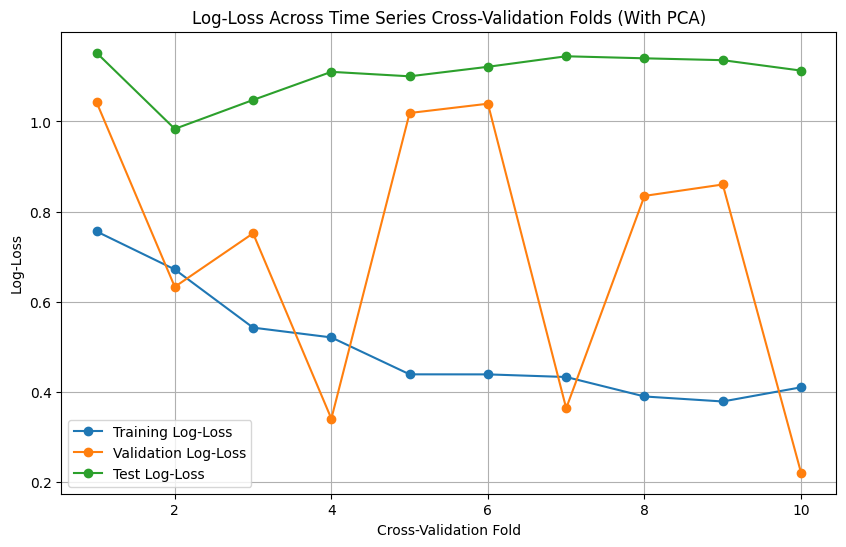

Final Log-Loss with PCA: 1.1129
Final Accuracy with PCA: 0.6539

Confusion Matrix with PCA:
[[ 93   0   4   3   0   3   0   4   0   0   1   1   1   0   0   0   0]
 [  0  99   0   0   0   0   7   0   1   0   0   0   0   2   0   0   1]
 [  0   1  37   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  2  13   2  97   0   1   4   5   1   0   1   3  10   7   0   0  11]
 [  0   0   0   0  12   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   1   0   0   0  87   0   0   0   0   0   3   0   0   0   0   0]
 [  0   5   0   3   0   0  60   0   1   0   0   0   0   0   0   0   1]
 [  5   1   1   1   0   0   0  76   0   0   0   0   4   3   0   0   3]
 [  0   2   0   1   0   1   0   1  44   0   0   1   0   1   0   0   3]
 [  1   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  68   0   0   0   0   0   1]
 [  0   0   0   0   0   0   0   1   0   0   0  25   0   0   0   0   0]
 [  0   0   0   0   0   1   0   0   1   0   0   0  63   

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import log_loss, accuracy_score, classification_report, confusion_matrix
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import xgboost as xgb

# Step 1: Load the dataset
file_path = 'refined_candlestick_patterns1.csv'
candlestick_data = pd.read_csv(file_path)

# Step 2: Feature Engineering
# Calculate technical indicators: EMA, Bollinger Bands, MACD, and candlestick-specific features
candlestick_data['EMA_5'] = candlestick_data['Close'].ewm(span=5, adjust=False).mean()
candlestick_data['EMA_10'] = candlestick_data['Close'].ewm(span=10, adjust=False).mean()
candlestick_data['EMA_20'] = candlestick_data['Close'].ewm(span=20, adjust=False).mean()

candlestick_data['BB_Middle'] = candlestick_data['Close'].rolling(window=20).mean()
candlestick_data['BB_Upper'] = candlestick_data['BB_Middle'] + 2 * candlestick_data['Close'].rolling(window=20).std()
candlestick_data['BB_Lower'] = candlestick_data['BB_Middle'] - 2 * candlestick_data['Close'].rolling(window=20).std()

ema_12 = candlestick_data['Close'].ewm(span=12, adjust=False).mean()
ema_26 = candlestick_data['Close'].ewm(span=26, adjust=False).mean()
candlestick_data['MACD'] = ema_12 - ema_26
candlestick_data['MACD_Signal'] = candlestick_data['MACD'].ewm(span=9, adjust=False).mean()

candlestick_data['Body_Size'] = abs(candlestick_data['Close'] - candlestick_data['Open'])
candlestick_data['Upper_Wick'] = candlestick_data['High'] - candlestick_data[['Open', 'Close']].max(axis=1)
candlestick_data['Lower_Wick'] = candlestick_data[['Open', 'Close']].min(axis=1) - candlestick_data['Low']
candlestick_data['Body_Wick_Ratio'] = candlestick_data['Body_Size'] / (candlestick_data['Upper_Wick'] + candlestick_data['Lower_Wick'] + 1e-6)

# Step 3: Create deeper sliding window features (10 candles back)
window_size = 10  # Deeper window
columns_to_shift = ['Open', 'High', 'Low', 'Close', 'Volume', 'EMA_5', 'EMA_10', 'EMA_20', 'MACD', 'MACD_Signal']

for i in range(1, window_size):
    for col in columns_to_shift:
        candlestick_data[f'{col}_lag_{i}'] = candlestick_data[col].shift(i)

# Drop rows with NaN values generated during feature calculation
candlestick_data.dropna(inplace=True)

# Step 4: Encode categorical columns: 'Trend' and 'Candlestick Pattern'
label_encoder_trend = LabelEncoder()
candlestick_data['Trend'] = label_encoder_trend.fit_transform(candlestick_data['Trend'])

label_encoder_pattern = LabelEncoder()
candlestick_data['Candlestick Pattern'] = label_encoder_pattern.fit_transform(candlestick_data['Candlestick Pattern'])

# Step 5: Data Augmentation (Jittering and Scaling)
def augment_data(data, jitter_factor=0.01, scale_factor=0.05, n_augmentations=2):
    augmented_data = []
    for _ in range(n_augmentations):
        # Jitter: Add small random noise to OHLC values
        jittered_data = data.copy()
        jittered_data['Open'] *= (1 + jitter_factor * np.random.randn(len(data)))
        jittered_data['High'] *= (1 + jitter_factor * np.random.randn(len(data)))
        jittered_data['Low'] *= (1 + jitter_factor * np.random.randn(len(data)))
        jittered_data['Close'] *= (1 + jitter_factor * np.random.randn(len(data)))

        # Scaling: Slightly scale the entire pattern
        scaling_factor = 1 + scale_factor * np.random.randn()
        jittered_data[['Open', 'High', 'Low', 'Close']] *= scaling_factor

        augmented_data.append(jittered_data)

    # Combine original and augmented data
    augmented_data = pd.concat([data] + augmented_data, ignore_index=True)
    return augmented_data

# Apply data augmentation to the original dataset
augmented_candlestick_data = augment_data(candlestick_data, jitter_factor=0.01, scale_factor=0.05, n_augmentations=3)

# Step 6: Separate features and target variable
X = augmented_candlestick_data.drop(columns=['Start', 'End', 'Candlestick Pattern'])
y = augmented_candlestick_data['Candlestick Pattern']

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 7: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Step 8: Apply SMOTE with Tomek Links to handle class imbalance
smote_tomek = SMOTETomek(smote=SMOTE(k_neighbors=1), random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)

# Step 9: Apply PCA for Dimensionality Reduction
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_resampled_pca = pca.fit_transform(X_resampled)
X_test_pca = pca.transform(X_test)

# Step 10: Initialize XGBoost Classifier
xgb_classifier_pca = xgb.XGBClassifier(
    n_estimators=80,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective='multi:softprob',
    num_class=len(np.unique(y)),
    reg_lambda=1.0,
    reg_alpha=0.5
)

# Step 11: Cross-Validation for Log-Loss Tracking
log_losses_train = []
log_losses_val = []
log_losses_test = []

tscv = TimeSeriesSplit(n_splits=10)

for train_index, val_index in tscv.split(X_resampled_pca):
    X_train_cv, X_val_cv = X_resampled_pca[train_index], X_resampled_pca[val_index]
    y_train_cv, y_val_cv = y_resampled[train_index], y_resampled[val_index]

    # Train the model on PCA-transformed features
    xgb_classifier_pca.fit(X_train_cv, y_train_cv)

    # Predict probabilities for log-loss calculation (Training set)
    y_train_pred_prob = xgb_classifier_pca.predict_proba(X_train_cv)
    train_log_loss = log_loss(y_train_cv, y_train_pred_prob, labels=np.arange(len(label_encoder_pattern.classes_)))
    log_losses_train.append(train_log_loss)

    # Predict probabilities for log-loss calculation (Validation set)
    y_val_pred_prob = xgb_classifier_pca.predict_proba(X_val_cv)
    val_log_loss = log_loss(y_val_cv, y_val_pred_prob, labels=np.arange(len(label_encoder_pattern.classes_)))
    log_losses_val.append(val_log_loss)

    # Predict probabilities for log-loss calculation (Test set)
    y_test_pred_prob = xgb_classifier_pca.predict_proba(X_test_pca)
    test_log_loss = log_loss(y_test, y_test_pred_prob, labels=np.arange(len(label_encoder_pattern.classes_)))
    log_losses_test.append(test_log_loss)

# Step 12: Plot log-loss graph for training, validation, and test sets
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(log_losses_train) + 1), log_losses_train, marker='o', label='Training Log-Loss')
plt.plot(range(1, len(log_losses_val) + 1), log_losses_val, marker='o', label='Validation Log-Loss')
plt.plot(range(1, len(log_losses_test) + 1), log_losses_test, marker='o', label='Test Log-Loss')
plt.xlabel('Cross-Validation Fold')
plt.ylabel('Log-Loss')
plt.title('Log-Loss Across Time Series Cross-Validation Folds (With PCA)')
plt.legend()
plt.grid(True)
plt.show()

# Step 13: Evaluate the model on the test set
y_test_pred_pca = xgb_classifier_pca.predict(X_test_pca)
y_test_pred_prob_pca = xgb_classifier_pca.predict_proba(X_test_pca)

# Calculate log-loss and accuracy for the test set
final_log_loss_pca = log_loss(y_test, y_test_pred_prob_pca)
final_accuracy_pca = accuracy_score(y_test, y_test_pred_pca)

# Print final log-loss and accuracy after PCA
print(f"Final Log-Loss with PCA: {final_log_loss_pca:.4f}")
print(f"Final Accuracy with PCA: {final_accuracy_pca:.4f}")

# Step 14: Confusion Matrix and Classification Report for PCA-transformed data
conf_matrix_pca = confusion_matrix(y_test, y_test_pred_pca)
classification_report_pca = classification_report(y_test, y_test_pred_pca, labels=np.arange(len(label_encoder_pattern.classes_)), target_names=label_encoder_pattern.classes_)

# Print Confusion Matrix and Classification Report
print("\nConfusion Matrix with PCA:")
print(conf_matrix_pca)

print("\nClassification Report with PCA:")
print(classification_report_pca)


<ipython-input-6-ec02f669555c>:42: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  candlestick_data[f'{col}_lag_{i}'] = candlestick_data[col].shift(i)
<ipython-input-6-ec02f669555c>:42: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  candlestick_data[f'{col}_lag_{i}'] = candlestick_data[col].shift(i)
<ipython-input-6-ec02f669555c>:42: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

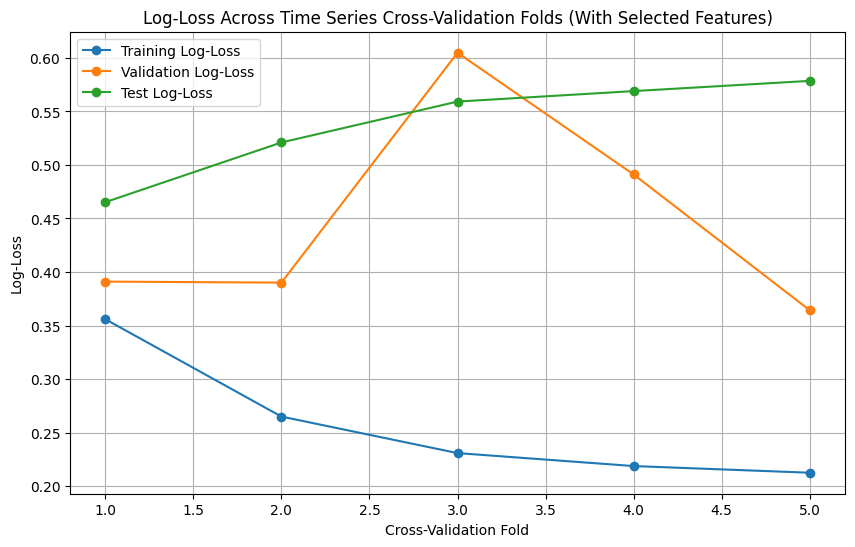

Final Log-Loss with Selected Features: 0.5786
Final Accuracy with Selected Features: 0.8169

Confusion Matrix with Selected Features:
[[ 98   0   0   4   0   0   0   5   0   0   0   0   0   3   0   0   0]
 [  0 102   0   0   0   0   3   0   3   0   0   0   0   0   0   0   2]
 [  0   0  38   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 157   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  12   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  89   0   0   0   0   0   0   0   0   0   0   3]
 [  0   0   0   0   0   0  67   0   3   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  91   0   0   0   0   3   0   0   0   0]
 [  0   0   0   0   0   0   0   0  54   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   2   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  69   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  26   0   0   0   0   0]
 [  0   0   0 

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import log_loss, accuracy_score, classification_report, confusion_matrix
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import xgboost as xgb

# Step 1: Load the dataset
file_path = 'refined_candlestick_patterns1.csv'
candlestick_data = pd.read_csv(file_path)

# Step 2: Feature Engineering
# Calculate technical indicators: EMA, Bollinger Bands, MACD, and candlestick-specific features
candlestick_data['EMA_5'] = candlestick_data['Close'].ewm(span=5, adjust=False).mean()
candlestick_data['EMA_10'] = candlestick_data['Close'].ewm(span=10, adjust=False).mean()
candlestick_data['EMA_20'] = candlestick_data['Close'].ewm(span=20, adjust=False).mean()

candlestick_data['BB_Middle'] = candlestick_data['Close'].rolling(window=20).mean()
candlestick_data['BB_Upper'] = candlestick_data['BB_Middle'] + 2 * candlestick_data['Close'].rolling(window=20).std()
candlestick_data['BB_Lower'] = candlestick_data['BB_Middle'] - 2 * candlestick_data['Close'].rolling(window=20).std()

ema_12 = candlestick_data['Close'].ewm(span=12, adjust=False).mean()
ema_26 = candlestick_data['Close'].ewm(span=26, adjust=False).mean()
candlestick_data['MACD'] = ema_12 - ema_26
candlestick_data['MACD_Signal'] = candlestick_data['MACD'].ewm(span=9, adjust=False).mean()

candlestick_data['Body_Size'] = abs(candlestick_data['Close'] - candlestick_data['Open'])
candlestick_data['Upper_Wick'] = candlestick_data['High'] - candlestick_data[['Open', 'Close']].max(axis=1)
candlestick_data['Lower_Wick'] = candlestick_data[['Open', 'Close']].min(axis=1) - candlestick_data['Low']
candlestick_data['Body_Wick_Ratio'] = candlestick_data['Body_Size'] / (candlestick_data['Upper_Wick'] + candlestick_data['Lower_Wick'] + 1e-6)

# Step 3: Create deeper sliding window features (10 candles back)
window_size = 10  # Deeper window
columns_to_shift = ['Open', 'High', 'Low', 'Close', 'Volume', 'EMA_5', 'EMA_10', 'EMA_20', 'MACD', 'MACD_Signal']

for i in range(1, window_size):
    for col in columns_to_shift:
        candlestick_data[f'{col}_lag_{i}'] = candlestick_data[col].shift(i)

# Drop rows with NaN values generated during feature calculation
candlestick_data.dropna(inplace=True)

# Step 4: Encode categorical columns: 'Trend' and 'Candlestick Pattern'
label_encoder_trend = LabelEncoder()
candlestick_data['Trend'] = label_encoder_trend.fit_transform(candlestick_data['Trend'])

label_encoder_pattern = LabelEncoder()
candlestick_data['Candlestick Pattern'] = label_encoder_pattern.fit_transform(candlestick_data['Candlestick Pattern'])

# Step 5: Data Augmentation (Jittering and Scaling)
def augment_data(data, jitter_factor=0.01, scale_factor=0.05, n_augmentations=2):
    augmented_data = []
    for _ in range(n_augmentations):
        # Jitter: Add small random noise to OHLC values
        jittered_data = data.copy()
        jittered_data['Open'] *= (1 + jitter_factor * np.random.randn(len(data)))
        jittered_data['High'] *= (1 + jitter_factor * np.random.randn(len(data)))
        jittered_data['Low'] *= (1 + jitter_factor * np.random.randn(len(data)))
        jittered_data['Close'] *= (1 + jitter_factor * np.random.randn(len(data)))

        # Scaling: Slightly scale the entire pattern
        scaling_factor = 1 + scale_factor * np.random.randn()
        jittered_data[['Open', 'High', 'Low', 'Close']] *= scaling_factor

        augmented_data.append(jittered_data)

    # Combine original and augmented data
    augmented_data = pd.concat([data] + augmented_data, ignore_index=True)
    return augmented_data

# Apply data augmentation to the original dataset
augmented_candlestick_data = augment_data(candlestick_data, jitter_factor=0.01, scale_factor=0.05, n_augmentations=3)

# Step 6: Separate features and target variable
X = augmented_candlestick_data.drop(columns=['Start', 'End', 'Candlestick Pattern'])
y = augmented_candlestick_data['Candlestick Pattern']

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 7: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Step 8: Apply SMOTE with Tomek Links to handle class imbalance
smote_tomek = SMOTETomek(smote=SMOTE(k_neighbors=1), random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)

# Step 9: Initialize XGBoost Classifier (Basic model for feature importance)
xgb_classifier = xgb.XGBClassifier(
    n_estimators=80,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective='multi:softprob',
    num_class=len(np.unique(y))
)

# Step 10: Train XGBoost and Get Feature Importance
xgb_classifier.fit(X_resampled, y_resampled)

# Get feature importance from XGBoost
feature_importance = xgb_classifier.feature_importances_

# Sort features by importance
important_features = np.argsort(feature_importance)[::-1]  # Most important features first

# Step 11: Select Top N Important Features
n_top_features = 20  # Keep top 20 features based on importance
X_resampled_selected = X_resampled[:, important_features[:n_top_features]]
X_test_selected = X_test[:, important_features[:n_top_features]]

# Step 12: Retrain XGBoost with Selected Features
xgb_classifier_selected = xgb.XGBClassifier(
    n_estimators=80,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective='multi:softprob',
    num_class=len(np.unique(y)),
    reg_lambda=1.0,
    reg_alpha=0.5
)
xgb_classifier_selected.fit(X_resampled_selected, y_resampled)

# Step 13: Cross-Validation and Evaluation with Selected Features

# Initialize lists to track log-loss for training, validation, and test
log_losses_train = []
log_losses_val = []
log_losses_test = []

# TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=5)

for train_index, val_index in tscv.split(X_resampled_selected):
    X_train_cv, X_val_cv = X_resampled_selected[train_index], X_resampled_selected[val_index]
    y_train_cv, y_val_cv = y_resampled[train_index], y_resampled[val_index]

    # Train the model on selected features
    xgb_classifier_selected.fit(X_train_cv, y_train_cv)

    # Predict probabilities for log-loss calculation (Training set)
    y_train_pred_prob = xgb_classifier_selected.predict_proba(X_train_cv)
    train_log_loss = log_loss(y_train_cv, y_train_pred_prob, labels=np.arange(len(label_encoder_pattern.classes_)))
    log_losses_train.append(train_log_loss)

    # Predict probabilities for log-loss calculation (Validation set)
    y_val_pred_prob = xgb_classifier_selected.predict_proba(X_val_cv)
    val_log_loss = log_loss(y_val_cv, y_val_pred_prob, labels=np.arange(len(label_encoder_pattern.classes_)))
    log_losses_val.append(val_log_loss)

    # Predict probabilities for log-loss calculation (Test set)
    y_test_pred_prob = xgb_classifier_selected.predict_proba(X_test_selected)
    test_log_loss = log_loss(y_test, y_test_pred_prob, labels=np.arange(len(label_encoder_pattern.classes_)))
    log_losses_test.append(test_log_loss)

# Step 14: Plot log-loss graph for training, validation, and test sets
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(log_losses_train) + 1), log_losses_train, marker='o', label='Training Log-Loss')
plt.plot(range(1, len(log_losses_val) + 1), log_losses_val, marker='o', label='Validation Log-Loss')
plt.plot(range(1, len(log_losses_test) + 1), log_losses_test, marker='o', label='Test Log-Loss')
plt.xlabel('Cross-Validation Fold')
plt.ylabel('Log-Loss')
plt.title('Log-Loss Across Time Series Cross-Validation Folds (With Selected Features)')
plt.legend()
plt.grid(True)
plt.show()

# Step 15: Evaluate the model with the selected features on the test set
y_test_pred_selected = xgb_classifier_selected.predict(X_test_selected)
y_test_pred_prob_selected = xgb_classifier_selected.predict_proba(X_test_selected)

# Calculate log-loss and accuracy for the test set
final_log_loss_selected = log_loss(y_test, y_test_pred_prob_selected)
final_accuracy_selected = accuracy_score(y_test, y_test_pred_selected)

# Print evaluation results
print(f"Final Log-Loss with Selected Features: {final_log_loss_selected:.4f}")
print(f"Final Accuracy with Selected Features: {final_accuracy_selected:.4f}")

# Confusion Matrix and Classification Report
conf_matrix_selected = confusion_matrix(y_test, y_test_pred_selected)
classification_report_selected = classification_report(y_test, y_test_pred_selected, labels=np.arange(len(label_encoder_pattern.classes_)), target_names=label_encoder_pattern.classes_)

print("\nConfusion Matrix with Selected Features:")
print(conf_matrix_selected)

print("\nClassification Report with Selected Features:")
print(classification_report_selected)



<ipython-input-5-c604c3831846>:42: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  candlestick_data[f'{col}_lag_{i}'] = candlestick_data[col].shift(i)
<ipython-input-5-c604c3831846>:42: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  candlestick_data[f'{col}_lag_{i}'] = candlestick_data[col].shift(i)
<ipython-input-5-c604c3831846>:42: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

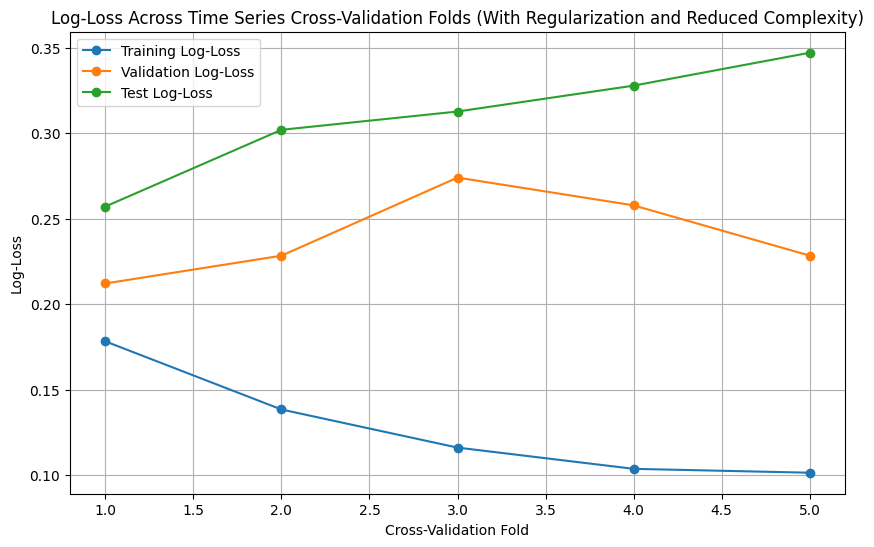

Final Log-Loss on Test Set: 0.3472
Final Accuracy on Test Set: 0.9156

Confusion Matrix:
[[100   0   0   4   0   0   0   3   0   0   0   0   3   0   0   0   0]
 [  0 110   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  38   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 153   0   0   0   0   0   0   0   0   0   4   0   0   0]
 [  0   0   0   0  12   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   1   0   0   0  91   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  67   0   3   0   0   0   0   0   0   0   0]
 [  4   0   0   0   0   0   0  90   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  54   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   2   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  69   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  26   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  67   0  

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import log_loss, accuracy_score, classification_report, confusion_matrix
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import xgboost as xgb

# Step 1: Load the dataset
file_path = 'refined_candlestick_patterns1.csv'
candlestick_data = pd.read_csv(file_path)

# Step 2: Feature Engineering
# Calculate technical indicators: EMA, Bollinger Bands, MACD, and candlestick-specific features
candlestick_data['EMA_5'] = candlestick_data['Close'].ewm(span=5, adjust=False).mean()
candlestick_data['EMA_10'] = candlestick_data['Close'].ewm(span=10, adjust=False).mean()
candlestick_data['EMA_20'] = candlestick_data['Close'].ewm(span=20, adjust=False).mean()

candlestick_data['BB_Middle'] = candlestick_data['Close'].rolling(window=20).mean()
candlestick_data['BB_Upper'] = candlestick_data['BB_Middle'] + 2 * candlestick_data['Close'].rolling(window=20).std()
candlestick_data['BB_Lower'] = candlestick_data['BB_Middle'] - 2 * candlestick_data['Close'].rolling(window=20).std()

ema_12 = candlestick_data['Close'].ewm(span=12, adjust=False).mean()
ema_26 = candlestick_data['Close'].ewm(span=26, adjust=False).mean()
candlestick_data['MACD'] = ema_12 - ema_26
candlestick_data['MACD_Signal'] = candlestick_data['MACD'].ewm(span=9, adjust=False).mean()

candlestick_data['Body_Size'] = abs(candlestick_data['Close'] - candlestick_data['Open'])
candlestick_data['Upper_Wick'] = candlestick_data['High'] - candlestick_data[['Open', 'Close']].max(axis=1)
candlestick_data['Lower_Wick'] = candlestick_data[['Open', 'Close']].min(axis=1) - candlestick_data['Low']
candlestick_data['Body_Wick_Ratio'] = candlestick_data['Body_Size'] / (candlestick_data['Upper_Wick'] + candlestick_data['Lower_Wick'] + 1e-6)

# Step 3: Create deeper sliding window features (10 candles back)
window_size = 10  # Deeper window
columns_to_shift = ['Open', 'High', 'Low', 'Close', 'Volume', 'EMA_5', 'EMA_10', 'EMA_20', 'MACD', 'MACD_Signal']

for i in range(1, window_size):
    for col in columns_to_shift:
        candlestick_data[f'{col}_lag_{i}'] = candlestick_data[col].shift(i)

# Drop rows with NaN values generated during feature calculation
candlestick_data.dropna(inplace=True)

# Step 4: Encode categorical columns: 'Trend' and 'Candlestick Pattern'
label_encoder_trend = LabelEncoder()
candlestick_data['Trend'] = label_encoder_trend.fit_transform(candlestick_data['Trend'])

label_encoder_pattern = LabelEncoder()
candlestick_data['Candlestick Pattern'] = label_encoder_pattern.fit_transform(candlestick_data['Candlestick Pattern'])

# Step 5: Data Augmentation (Jittering and Scaling)
def augment_data(data, jitter_factor=0.01, scale_factor=0.05, n_augmentations=2):
    augmented_data = []
    for _ in range(n_augmentations):
        # Jitter: Add small random noise to OHLC values
        jittered_data = data.copy()
        jittered_data['Open'] *= (1 + jitter_factor * np.random.randn(len(data)))
        jittered_data['High'] *= (1 + jitter_factor * np.random.randn(len(data)))
        jittered_data['Low'] *= (1 + jitter_factor * np.random.randn(len(data)))
        jittered_data['Close'] *= (1 + jitter_factor * np.random.randn(len(data)))

        # Scaling: Slightly scale the entire pattern
        scaling_factor = 1 + scale_factor * np.random.randn()
        jittered_data[['Open', 'High', 'Low', 'Close']] *= scaling_factor

        augmented_data.append(jittered_data)

    # Combine original and augmented data
    augmented_data = pd.concat([data] + augmented_data, ignore_index=True)
    return augmented_data

# Apply data augmentation to the original dataset
augmented_candlestick_data = augment_data(candlestick_data, jitter_factor=0.01, scale_factor=0.05, n_augmentations=3)

# Step 6: Separate features and target variable
X = augmented_candlestick_data.drop(columns=['Start', 'End', 'Candlestick Pattern'])
y = augmented_candlestick_data['Candlestick Pattern']

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 7: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Step 8: Apply SMOTE with Tomek Links to handle class imbalance
smote_tomek = SMOTETomek(smote=SMOTE(k_neighbors=1), random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)

# Step 9: Initialize XGBoost Classifier with Regularization and Reduced Complexity
xgb_classifier = xgb.XGBClassifier(
    n_estimators=80,           # Reduced number of trees
    max_depth=6,               # Reduced tree depth
    learning_rate=0.1,
    subsample=0.8,             # Control overfitting
    colsample_bytree=0.8,
    random_state=42,
    objective='multi:softprob', # Multiclass classification
    num_class=len(np.unique(y)),# Number of classes
    reg_lambda=1.0,            # L2 regularization term
    reg_alpha=0.5              # L1 regularization term
)

# Step 10: Cross-Validation for Log-Loss Tracking
log_losses_train = []
log_losses_val = []
log_losses_test = []

tscv = TimeSeriesSplit(n_splits=5)

for train_index, val_index in tscv.split(X_resampled):
    X_train_cv, X_val_cv = X_resampled[train_index], X_resampled[val_index]
    y_train_cv, y_val_cv = y_resampled[train_index], y_resampled[val_index]

    # Train the model
    xgb_classifier.fit(X_train_cv, y_train_cv)

    # Predict probabilities for log-loss calculation (Training set)
    y_train_pred_prob = xgb_classifier.predict_proba(X_train_cv)
    train_log_loss = log_loss(y_train_cv, y_train_pred_prob, labels=np.arange(len(label_encoder_pattern.classes_)))
    log_losses_train.append(train_log_loss)

    # Predict probabilities for log-loss calculation (Validation set)
    y_val_pred_prob = xgb_classifier.predict_proba(X_val_cv)
    val_log_loss = log_loss(y_val_cv, y_val_pred_prob, labels=np.arange(len(label_encoder_pattern.classes_)))
    log_losses_val.append(val_log_loss)

    # Predict probabilities for log-loss calculation (Test set)
    y_test_pred_prob = xgb_classifier.predict_proba(X_test)
    test_log_loss = log_loss(y_test, y_test_pred_prob, labels=np.arange(len(label_encoder_pattern.classes_)))
    log_losses_test.append(test_log_loss)

# Plot log-loss graph for training, validation, and test sets
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(log_losses_train) + 1), log_losses_train, marker='o', label='Training Log-Loss')
plt.plot(range(1, len(log_losses_val) + 1), log_losses_val, marker='o', label='Validation Log-Loss')
plt.plot(range(1, len(log_losses_test) + 1), log_losses_test, marker='o', label='Test Log-Loss')
plt.xlabel('Cross-Validation Fold')
plt.ylabel('Log-Loss')
plt.title('Log-Loss Across Time Series Cross-Validation Folds (With Regularization and Reduced Complexity)')
plt.legend()
plt.grid(True)
plt.show()

# Step 11: Evaluate the model on the test set
y_test_pred_prob = xgb_classifier.predict_proba(X_test)
y_test_pred = xgb_classifier.predict(X_test)

# Calculate log-loss and accuracy for the test set
final_log_loss = log_loss(y_test, y_test_pred_prob, labels=np.arange(len(label_encoder_pattern.classes_)))
final_accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred, labels=np.arange(len(label_encoder_pattern.classes_)))
classification_report_final = classification_report(y_test, y_test_pred, labels=np.arange(len(label_encoder_pattern.classes_)), target_names=label_encoder_pattern.classes_)

# Print results
print(f"Final Log-Loss on Test Set: {final_log_loss:.4f}")
print(f"Final Accuracy on Test Set: {final_accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report_final)